In [1]:
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
    # !pip install -q -U tfx==0.15.0rc0
    print("You can safely ignore the package incompatibility errors.")
except Exception:
    pass


import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"
print(tf.__version__)

from tensorflow.keras.utils import plot_model

TensorFlow 2.x selected.
You can safely ignore the package incompatibility errors.
2.1.0


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10, 10)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                1010      
_________________________________________________________________
activation (Activation)      (None, 10)                0         
Total params: 1,010
Trainable params: 1,010
Non-trainable params: 0
_________________________________________________________________


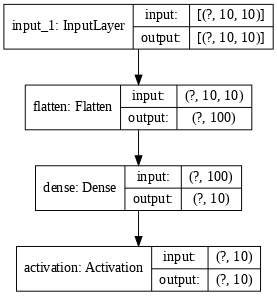

In [0]:
# Base FC
# Y = H(X, Wh)
# where y is target, x is input , Wh is weight

input_ = keras.layers.Input(shape=(10,10)) # shape = (None, 10, 10)
x = keras.layers.Flatten()(input_) # shape = (None, 100)
x = keras.layers.Dense(10)(x)
x = keras.layers.Activation("relu")(x)

base_model = keras.models.Model(input_, x)

base_model.summary()
plot_model(base_model, show_shapes=True, dpi = 70)

The High way network for FC layers

+) requires add constraint


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 10, 10)]     0                                            
__________________________________________________________________________________________________
flatten_1 (Flatten)             (None, 100)          0           input_2[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 100)          10100       flatten_1[0][0]                  
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 100)          10100       flatten_1[0][0]                  
____________________________________________________________________________________________

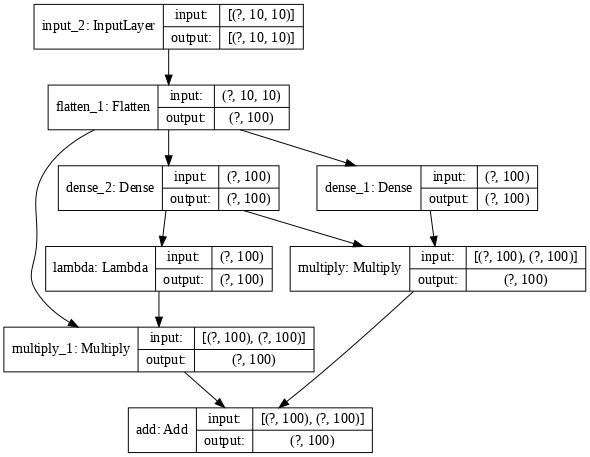

In [0]:
input_ = keras.layers.Input(shape=(10,10))
x = keras.layers.Flatten()(input_)

units = x.shape[-1]
H = keras.layers.Dense(units, activation='relu')(x)
T = keras.layers.Dense(units, activation='sigmoid')(x)

transform_gate = keras.layers.Multiply()([H,T])

carry_function = lambda x : 1.0 - x
carry_gate = keras.layers.Lambda(carry_function)(T)
carry_gate = keras.layers.Multiply()([x, carry_gate])

y_hat = keras.layers.Add()([transform_gate, carry_gate])

fc_highway = keras.models.Model(input_, y_hat)

fc_highway.summary()
plot_model(fc_highway, show_shapes=True, dpi = 70, expand_nested=True)

## Highway nework testing

## Implementation Test

In [0]:
from keras.datasets import mnist, cifar10
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [0]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)


In [0]:
# Data Normalize

x_train = (x_train - 127.5) / 127.7
x_test = (x_test - 127.5) / 127.5

In [0]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [0]:
class hyperparams:
  dense_units=128
  output_units=10
  activation='relu'
  batch_size=128


In [0]:
hp = hyperparams()

In [0]:
def plane_model():
  input_ = keras.layers.Input(shape = (32,32,3))
  x = keras.layers.Flatten()(input_)
  
  x = keras.layers.Dense(hp.dense_units, activation='relu')(x)

  for i in range(5):
    x = keras.layers.Dense(hp.dense_units, activation='relu')(x)
  
  out_ = keras.layers.Dense(10, activation='softmax')(x)

  model = keras.models.Model(input_, out_)
  model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])
  return model

In [0]:
model_1 = plane_model()

In [0]:
model_1.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_73 (Dense)             (None, 128)               393344    
_________________________________________________________________
dense_74 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_75 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_76 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_77 (Dense)             (None, 128)               1651

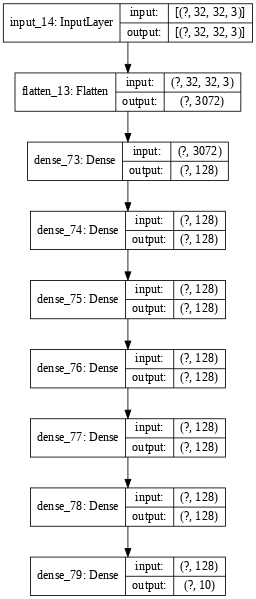

In [0]:
plot_model(model_1, show_shapes=True, dpi=60)

In [0]:
# when using sparse categorical loss

plane_hist = model_1.fit(x_train, y_train, batch_size=512, epochs=100, validation_data=(x_test, y_test))

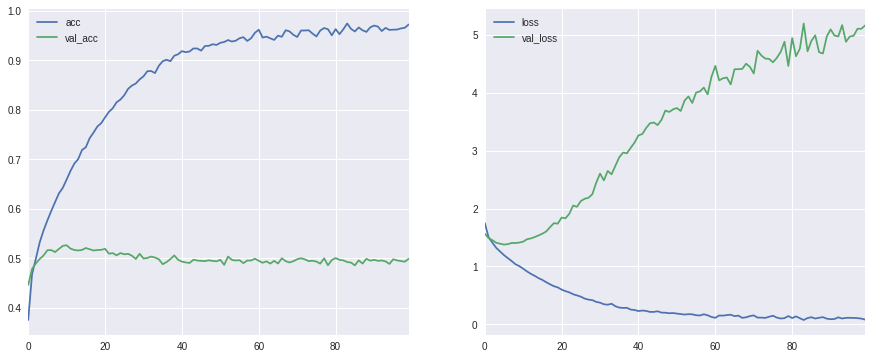

In [0]:
hist_df = pd.DataFrame(plane_hist.history)
# hist_df.plot()
# hist_df.head()

plt.style.use('seaborn')
ax = plt.figure(figsize=(15,6))
ax1 = plt.subplot(1,2,1)
hist_df.iloc[:, [1,3]].plot(ax=ax1)

ax2 = plt.subplot(1,2,2)
hist_df.iloc[:, [0,2]].plot(ax=ax2)

### using categorical crossentropy by converting the y data to be categorical

In [0]:
from keras.datasets import mnist, cifar10
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.utils import to_categorical

Using TensorFlow backend.


In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [0]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)


In [0]:
# Data Normalize
x_train = (x_train - 127.5) / 127.7
x_test = (x_test - 127.5) / 127.5

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [0]:
class hyperparams:
  dense_units=128
  output_units=10
  activation='relu'
  batch_size=128


In [0]:
hp = hyperparams()

In [0]:
def plane_model():
  input_ = keras.layers.Input(shape = (32,32,3))
  x = keras.layers.Flatten()(input_)
  
  x = keras.layers.Dense(hp.dense_units, activation='relu')(x)

  for i in range(5):
    x = keras.layers.Dense(hp.dense_units, activation='relu')(x)
  
  out_ = keras.layers.Dense(10, activation='softmax')(x)

  model = keras.models.Model(input_, out_)
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
  return model

In [0]:
model_1 = plane_model()

In [0]:
model_1.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_80 (Dense)             (None, 128)               393344    
_________________________________________________________________
dense_81 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_82 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_83 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_84 (Dense)             (None, 128)               1651

In [0]:
# when using categorical loss

plane_hist = model_1.fit(x_train, y_train, batch_size=512, epochs=100, validation_data=(x_test, y_test))

# Highway Net testing

In [2]:
from keras.datasets import mnist, cifar10
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Using TensorFlow backend.


In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [4]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)


In [0]:
# Data Normalize
x_train = (x_train - 127.5) / 127.7
x_test = (x_test - 127.5) / 127.5

In [6]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [0]:
from tensorflow.keras import backend as K

In [0]:
def highway(x):
  units = K.int_shape(x)[-1]
  H = keras.layers.Dense(units, activation='relu')(x)
  T = keras.layers.Dense(units, activation='sigmoid')(x)

  transform_gate = keras.layers.Multiply()([H,T])

  carry_function = lambda x : 1.0 - x
  carry_gate = keras.layers.Lambda(carry_function)(T)
  carry_gate = keras.layers.Multiply()([x, carry_gate])

  y_hat = keras.layers.Add()([transform_gate, carry_gate])
  return y_hat

In [0]:
def plane_model():
  input_ = keras.layers.Input(shape = (32,32,3))
  x = keras.layers.Flatten()(input_)
  h = highway(x)
  for i in range(5):
    h = highway(h)
  out_ = keras.layers.Dense(10, activation='softmax')(h)
  model = keras.models.Model(input_, out_)
  model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])
  return model

In [0]:
hw_model = plane_model()

In [0]:
hw_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
flatten_10 (Flatten)            (None, 3072)         0           input_11[0][0]                   
__________________________________________________________________________________________________
dense_20 (Dense)                (None, 3072)         9440256     flatten_10[0][0]                 
__________________________________________________________________________________________________
dense_19 (Dense)                (None, 3072)         9440256     flatten_10[0][0]                 
____________________________________________________________________________________________

In [0]:
# when using categorical loss
tf.config.experimental_run_functions_eagerly(True)
hw_hist = hw_model.fit(x_train, y_train, batch_size=512, epochs=100, validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 11s 215us/sample - loss: 1.6799 - acc: 0.4093 - val_loss: 1.4439 - val_acc: 0.4854
Epoch 2/100
50000/50000 [==============================] - 9s 182us/sample - loss: 1.3029 - acc: 0.5376 - val_loss: 1.3433 - val_acc: 0.5202
Epoch 3/100
50000/50000 [==============================] - 9s 180us/sample - loss: 1.0938 - acc: 0.6105 - val_loss: 1.3272 - val_acc: 0.5367
Epoch 4/100
50000/50000 [==============================] - 9s 182us/sample - loss: 0.8837 - acc: 0.6844 - val_loss: 1.4008 - val_acc: 0.5413
Epoch 5/100
50000/50000 [==============================] - 9s 181us/sample - loss: 0.6851 - acc: 0.7543 - val_loss: 1.5691 - val_acc: 0.5390
Epoch 6/100
50000/50000 [==============================] - 9s 181us/sample - loss: 0.5268 - acc: 0.8126 - val_loss: 1.7212 - val_acc: 0.5376
Epoch 7/100
50000/50000 [==============================] - 9s 179us/sample - loss: 0.4059 - acc: 0.8575

In [0]:
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Activation, Multiply, Add, Lambda
import tensorflow.keras.initializers


def highway_layers(value, n_layers, activation="tanh", gate_bias=-3):
    dim = K.int_shape(value)[-1]
    gate_bias_initializer = keras.initializers.Constant(gate_bias)
    for i in range(n_layers):     
        gate = Dense(units=dim, bias_initializer=gate_bias_initializer)(value)
        gate = Activation("sigmoid")(gate)
        negated_gate = Lambda(
            lambda x: 1.0 - x,
            output_shape=(dim,))(gate)
        transformed = Dense(units=dim)(value)
        transformed = Activation(activation)(transformed)

        transformed_gated = Multiply()([gate, transformed])
        identity_gated = Multiply()([negated_gate, value])
        value = Add()([transformed_gated, identity_gated])
    return value


For highway layers, we use the transform gate defined as T(x) = σ(WT
Tx+bT), whereWT is the weight matrix
and bT the bias vector for the transform gates. This sug- gests a simple initialization scheme which is independent of the nature of H: bT can be initialized with a negative value (e.g. -1, -3 etc.) such that the network is initially biased towards carry behavior

In [0]:
def highway_layers(value, activation="relu", gate_bias=-1):
  dim = K.int_shape(value)[-1]
  gate_bias_initializer = keras.initializers.Constant(gate_bias)

  gate = Dense(units=dim, bias_initializer=gate_bias_initializer)(value)
  gate = Activation("sigmoid")(gate)
  negated_gate = Lambda(lambda x: 1.0 - x, output_shape=(dim,))(gate)
  transformed = Dense(units=dim)(value)
  transformed = Activation(activation)(transformed)

  transformed_gated = Multiply()([gate, transformed])
  identity_gated = Multiply()([negated_gate, value])
  value = Add()([transformed_gated, identity_gated])
  return value

In [0]:
input_ = keras.layers.Input(shape = (32,32,3))
x= keras.layers.Flatten()(input_)
x = keras.layers.Dense(128, activation='relu')(x)
for _ in range(10):
  x = highway_layers(x)
out_ = keras.layers.Dense(10, activation='softmax')(x)

model = keras.models.Model(input_, out_)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])

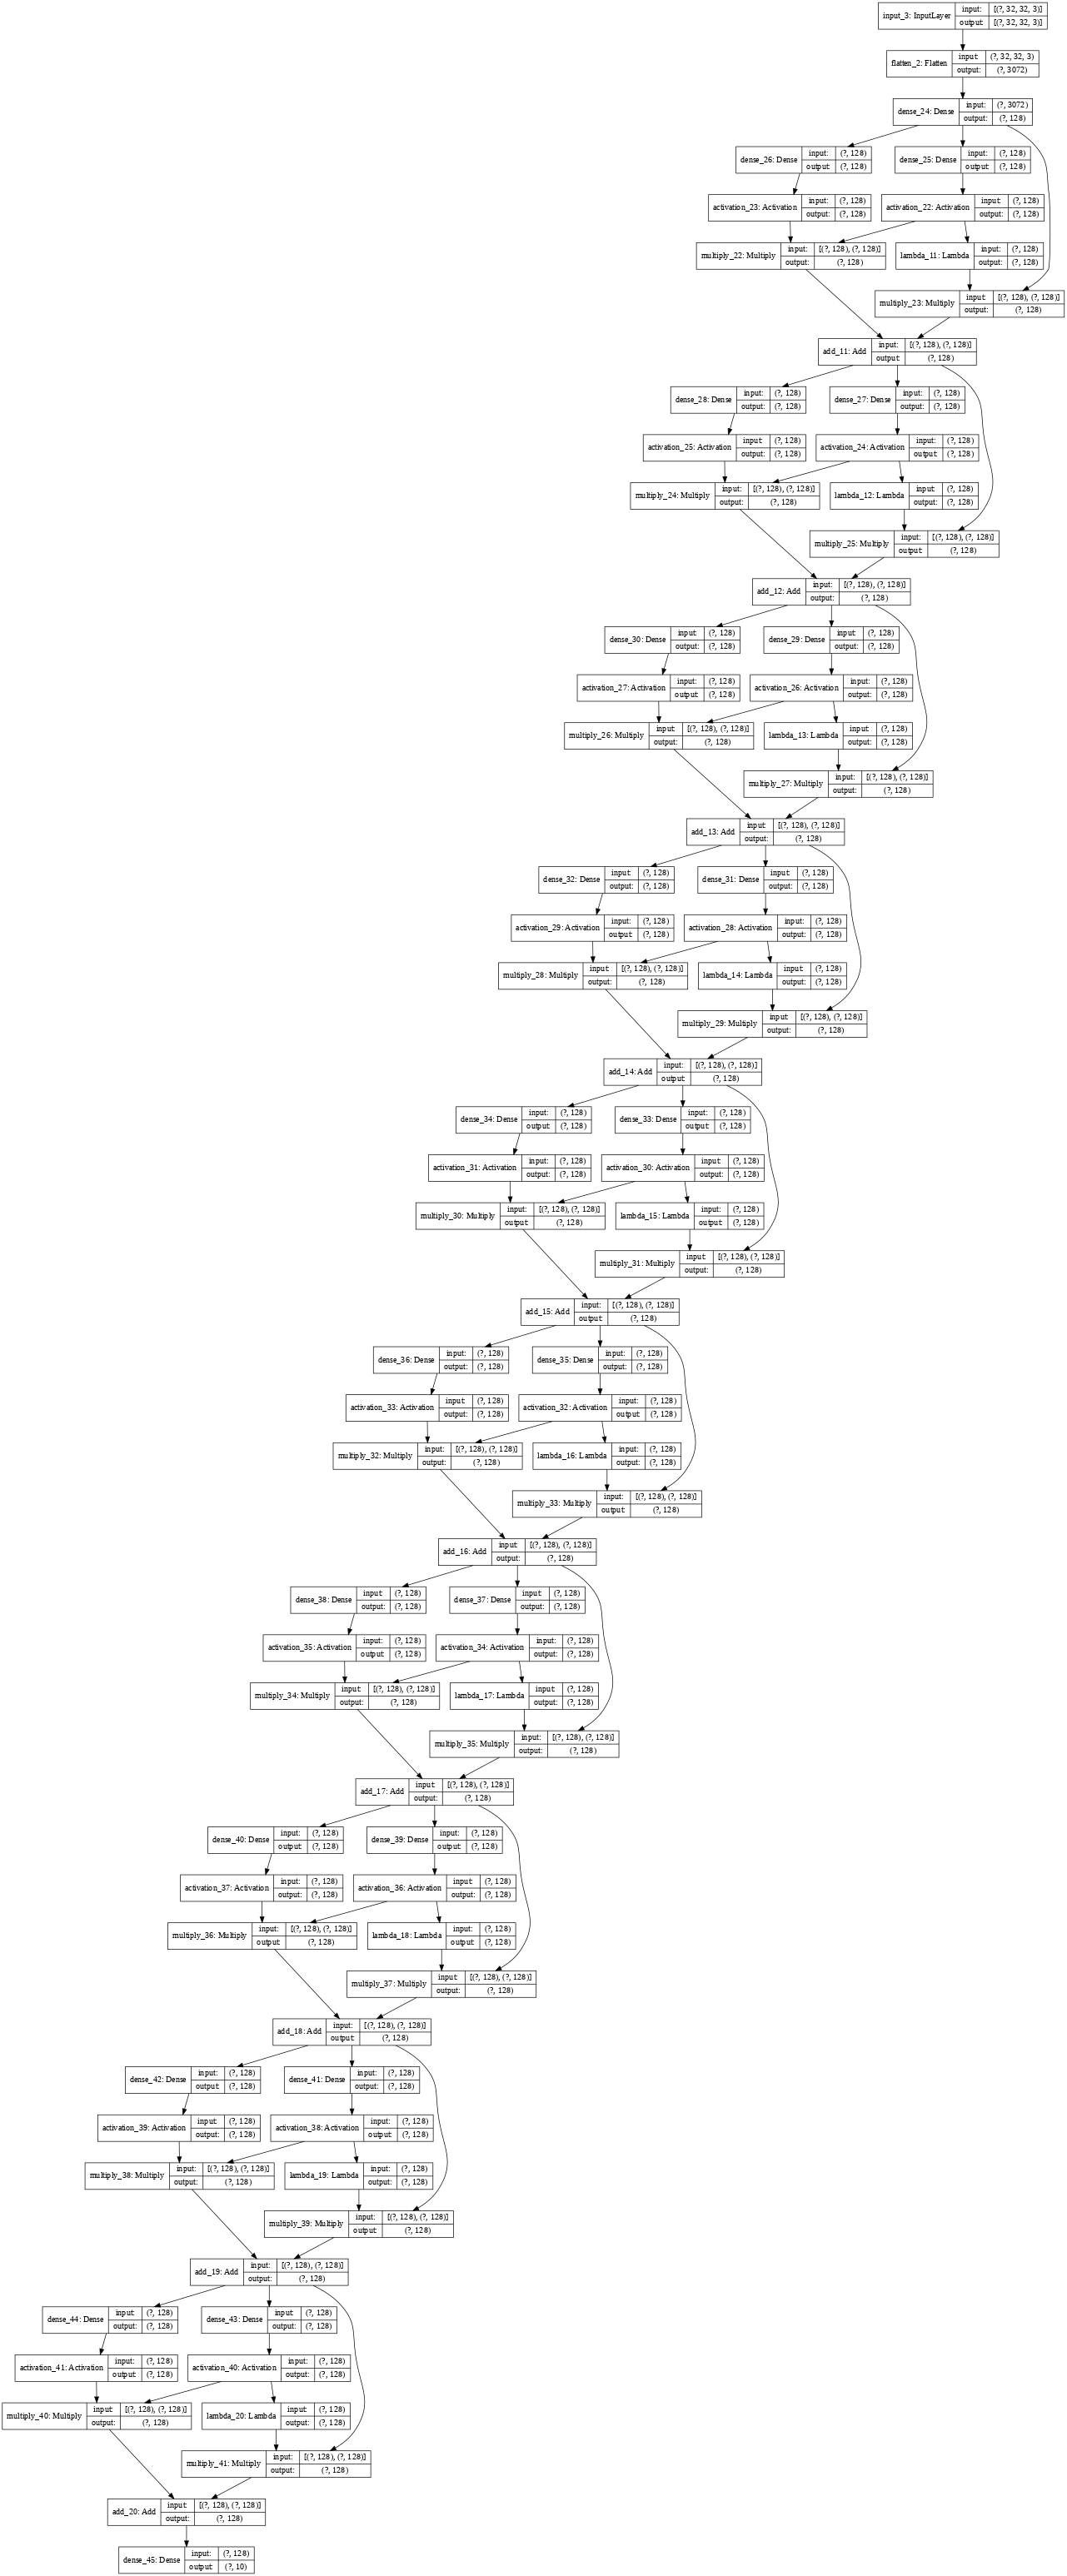

In [18]:
plot_model(model, show_shapes=True, dpi=50)

In [19]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
flatten_2 (Flatten)             (None, 3072)         0           input_3[0][0]                    
__________________________________________________________________________________________________
dense_24 (Dense)                (None, 128)          393344      flatten_2[0][0]                  
__________________________________________________________________________________________________
dense_25 (Dense)                (None, 128)          16512       dense_24[0][0]                   
____________________________________________________________________________________________

In [20]:
# when using categorical loss
tf.config.experimental_run_functions_eagerly(True)
hw_hist = model.fit(x_train, y_train, batch_size=512, epochs=100, validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 8s 152us/sample - loss: 1.7415 - acc: 0.3796 - val_loss: 1.5558 - val_acc: 0.4438
Epoch 2/100
50000/50000 [==============================] - 7s 147us/sample - loss: 1.4748 - acc: 0.4749 - val_loss: 1.4464 - val_acc: 0.4905
Epoch 3/100
50000/50000 [==============================] - 7s 147us/sample - loss: 1.3539 - acc: 0.5157 - val_loss: 1.4016 - val_acc: 0.5051
Epoch 4/100
50000/50000 [==============================] - 7s 147us/sample - loss: 1.2528 - acc: 0.5573 - val_loss: 1.3909 - val_acc: 0.5088
Epoch 5/100
50000/50000 [==============================] - 7s 148us/sample - loss: 1.1684 - acc: 0.5825 - val_loss: 1.3876 - val_acc: 0.5186
Epoch 6/100
50000/50000 [==============================] - 7s 146us/sample - loss: 1.0904 - acc: 0.6126 - val_loss: 1.4025 - val_acc: 0.5165
Epoch 7/100
50000/50000 [==============================] - 7s 146us/sample - loss: 1.0139 - acc: 0.6375 

KeyboardInterrupt: ignored